## Считаем гомологии по матрице расстояний с помощью Юли и Ирен
 - чтобы заработало, надо установить julia, 
 - ядро в юпитер https://datatofish.com/add-julia-to-jupyter/
 - потом по инструкции https://github.com/Eetion/Eirene.jl
 - отдельно пакет для чтения MAT файлов

In [21]:
using Eirene
using MAT
using LinearAlgebra
using Printf
using PyPlot
using Statistics

### Читаем данные
Данные представлены в виде коэффициентов корреляций, как положительных так и отрицательных. Для работы  с TDA нужно иметь
на входе матрицу расстояний. В нашем случае чем коэффициент корреляции больше, тем расстояние меньше.
Можно разными способами преобразовывать данные, ниже все отрицательные значения обнуляются, 
потом ко всем значениям добавляется маленькая добавка и вычисляется обратное значение, в результате то, 
что было почти нулем становится очень далеким.  

In [93]:
folder_path = "../Dec_vs_Hon_207_ROIs/cPPI/";
file_path = string(folder_path, "cPPI_Dec_vs_baseline.mat");
matrix = matread(file_path);
cor_dec = matrix["ppi_cor"];

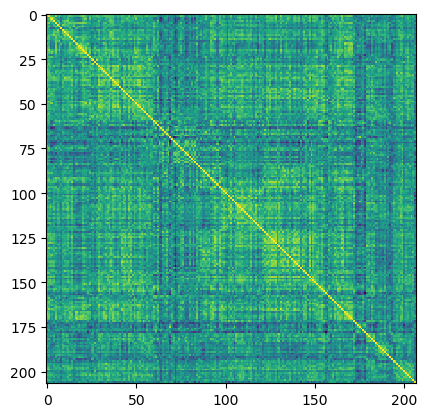

PyObject <matplotlib.image.AxesImage object at 0x150180350>

In [58]:
imshow(cor_dec[:,:,24])

In [94]:
function get_distance(matrix, pos = true)
    if !pos
        matrix = matrix.*-1
    end    
    matrix[findall(matrix.< 0)].=0;
    distC = ((matrix.-1).*(-1)).^0.5;
    distC[diagind(distC)].= 0; 
    return distC
end  

get_distance (generic function with 2 methods)

In [91]:
distC = get_distance(cor_dec[:,:,1]);

In [92]:
distC[1:10,1:10] 

10×10 Array{Float64,2}:
 0.0       0.692057  0.73798   0.74134   …  0.833086  0.802013  0.946341
 0.692057  0.0       0.731313  0.771852     0.763865  0.877417  0.905706
 0.73798   0.731313  0.0       0.568073     0.842971  0.945766  0.915321
 0.74134   0.771852  0.568073  0.0          0.901817  0.9453    0.882877
 0.773992  0.700196  0.552213  0.631402     0.768538  0.882322  0.825456
 0.632556  0.718768  0.593077  0.591106  …  0.748558  0.871932  0.846833
 0.833319  0.791009  0.772128  0.817699     0.555704  0.923815  0.683603
 0.833086  0.763865  0.842971  0.901817     0.0       0.919552  0.746806
 0.802013  0.877417  0.945766  0.9453       0.919552  0.0       0.993811
 0.946341  0.905706  0.915321  0.882877     0.746806  0.993811  0.0     

## Вычисление гомологий
Осуществляется с помощью пакеты eirene, на вход отдается матрица расстояний и максимальная размерность, на выходе получаем словарь, в котором нас интересуют сами гомологии и представители циклов

In [43]:
C = eirene(distC, maxdim = 2)

Dict{String,Any} with 12 entries:
  "symmat"   => [19271 19105 … 4110 2091; 19105 19271 … 1 1258; … ; 4110 1 … 19…
  "maxnz"    => [0, 2693, 109361, 3874967, 0]
  "firstv"   => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  199, 200, 201…
  "cyclerep" => Array{Array{Int64,1},1}[[], [[1, 2], [7, 10], [6, 9], [77, 92],…
  "phi"      => Array{Int64,1}[[], [1, 1224, 1023, 12821, 3581, 18048, 12280, 1…
  "plo"      => Array{Int64,1}[[], [2, 10, 9, 92, 19, 174, 73, 11, 112, 55  …  …
  "ocg2rad"  => [1.0, 0.999966, 0.999916, 0.999733, 0.999725, 0.999706, 0.99969…
  "farfaces" => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  198, 199, 200…
  "nvl2ovl"  => [77, 2, 164, 56, 1, 36, 154, 163, 37, 30  …  138, 70, 15, 11, 1…
  "input"    => Dict{String,Any}("genera"=>[0.0 0.478942 … 0.575418 0.750238; 0…
  "tid"      => Array{Int64,1}[[], [2, 10, 9, 92, 19, 174, 73, 11, 112, 55  …  …
  "grain"    => Array{Int64,1}[[19271, 19271, 19271, 19271, 19271, 19271, 19271…

In [51]:
function print_reprs(С,class,dim)
    b = barcode(С, dim = dim)
    ints = @sprintf "[%.3f, %.3f): " b[class,1] b[class,2]
    repr = classrep(C, class = class, dim = dim)
    simplList = []
    for i in collect(1:size(repr)[2]) 
        push!(simplList,"["*join(string.(repr[:,i]),",")*"]")
    end  
    return string(ints,join(simplList,"+"),"\n")
    
    end  
function print_all_reprs(С,dim)
    b = barcode(С, dim = dim)
    num = size(b)[1]
    intervals = [string("Dimension: ", dim,"\n")]
    println("Printing", intervals[1])
    for j in collect(1:size(b)[1])
        class  = j
        ints = @sprintf "[%.3f, %.3f): " b[class,1] b[class,2]
        repr = classrep(C, class = class, dim = dim)
        simplList = []
        for i in collect(1:size(repr)[2]) 
            push!(simplList,"["*join(string.(repr[:,i]),",")*"]")
        end  
        push!(intervals, string(ints,join(simplList,"+"),"\n"))
        end   
    return intervals
    
    end 

print_all_reprs (generic function with 1 method)

In [54]:
function write_barcode_to_file(C, filename; maxdim = 1)
    """
    здесь пишем только гомологии одной размерности
    """

    open(filename,"w") do f
        
        for dim in collect(0:maxdim)
        
            b = barcode(C, dim = dim)
            num = size(b)[1]
        
            write(f,string("Dimension: ", dim,"\n"))
            #println(string("Dimension: ", dim,"\n"))
                  
            
            for j in collect(1:num)
    
                ints = @sprintf "[%.3f, %.3f): " b[j,1] b[j,2]
                repr = classrep(C, class = j, dim = dim)
                part1 = @sprintf "[%.3f, %.3f): " b[j,1] b[j,2]
            
                simplList = []
                for i in collect(1:size(repr)[2]) 
                    push!(simplList,"["*join(string.(repr[:,i]),",")*"]")
                end 
            
                part2 = string(part1, join(simplList,"+"),"\n")
                write(f,part2)
                #println(part2)
            end
        end
        
    end
end

write_barcode_to_file (generic function with 1 method)

In [55]:
subId = "01_"
dec = "Dec"
filename = string("../Dec_vs_Hon_207_ROIs/intEirene/",subId,"int_cPPI_207",dec,".txt")
write_barcode_to_file(C, filename, maxdim = 2)

In [62]:
subId = 23
string("../Dec_vs_Hon_207_ROIs/intEirene/",subId,"_int_cPPI_207Dec.txt")

"../Dec_vs_Hon_207_ROIs/intEirene/23_int_cPPI_207Dec.txt"

### Вычисляем для Deception > baseline гомологии вплоть до размера 2
Вообще можно было бы посмотреть и войды потом, но пока только циклы и связные компоненты пишем и смотрим

In [95]:
function process_one_sub(matrix,subId, isDec)

        distC = get_distance(matrix[:,:,subId]);
        C = eirene(distC, maxdim = 2)
        if length(string(subId))<2
            subId = string("0",subId)
        end
        if isDec
            dec = "Dec"
        else
            dec = "Honest"
        end  
        filename = string("../Dec_vs_Hon_207_ROIs/intEirene/",subId,"_int_cPPI_207",dec,".txt")
        write_barcode_to_file(C, filename, maxdim = 2)       
    return 0    
    
end 

process_one_sub (generic function with 2 methods)

In [79]:
folder_path = "../Dec_vs_Hon_207_ROIs/cPPI/";
file_path = string(folder_path, "cPPI_Hon_vs_baseline.mat");
matrix = matread(file_path);
cor_dec = matrix["ppi_cor"]
process_one_sub(cor_dec,1, false)

0

In [98]:
folder_path = "../Dec_vs_Hon_207_ROIs/cPPI/";
file_path = string(folder_path, "cPPI_Dec_vs_baseline.mat");
matrix = matread(file_path);
cor_dec = matrix["ppi_cor"];
for id_ in collect(11:24)
    println("Process subid ", string(id_))
    process_one_sub(cor_dec,id_,true);
end  

Process subid 11
Process subid 12
Process subid 13
Process subid 14
Process subid 15
Process subid 16
Process subid 17
Process subid 18
Process subid 19
Process subid 20
Process subid 21
Process subid 22
Process subid 23
Process subid 24


In [ ]:
folder_path = "../Dec_vs_Hon_207_ROIs/cPPI/";
file_path = string(folder_path, "cPPI_Hon_vs_baseline.mat");
matrix = matread(file_path);
cor_dec = matrix["ppi_cor"];
for id_ in collect(11:24)
    println("Process subid ", string(id_))
    process_one_sub(cor_dec,id_,false);
end  

Process subid 11
Process subid 12
Process subid 13
Process subid 14
Process subid 15
Process subid 16
Process subid 17
Process subid 18
Process subid 19
Process subid 20
Process subid 21
Process subid 22
Process subid 23
Process subid 24
